In [4]:
#Importing libraries as pd

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
#creating path
path = r'C:\Users\rbrand\12-28-2024 Instacart Basket Analysis'

In [6]:
#Importing ords_prods_merge.pkl data set from prepared data.
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge.pkl')
ords_prods_merge = pd.read_pickle(file_path)

In [7]:
ords_prods_merge.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,order_frequency_days,product_id,add_to_cart_order,reordered,...,prices,merge_flag,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_frequency_flag
0,0,2539329,1,1,2,8,NaN,196,1,0,...,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,Low spender,Non-frequent customer
1,1,2398795,1,2,3,7,15.0,196,1,1,...,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,Low spender,Non-frequent customer
2,2,473747,1,3,3,12,21.0,196,1,1,...,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,Low spender,Non-frequent customer
3,3,2254736,1,4,4,7,29.0,196,1,1,...,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,Low spender,Non-frequent customer
4,4,431534,1,5,4,15,28.0,196,1,1,...,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,Low spender,Non-frequent customer


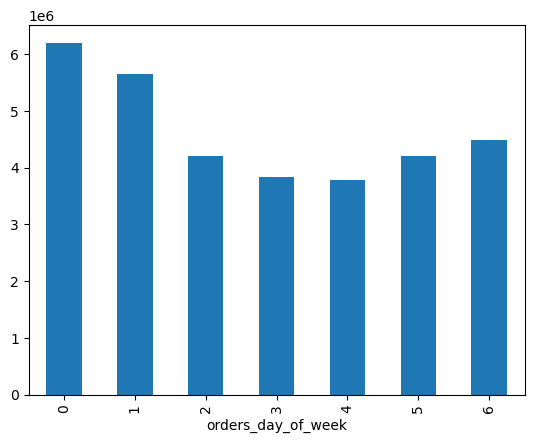

In [10]:
#Creating a bar chart, determining the largest and smallest categories.
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()


In [12]:
#Printing frequencies as reference,determining the largest and smallest categories:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

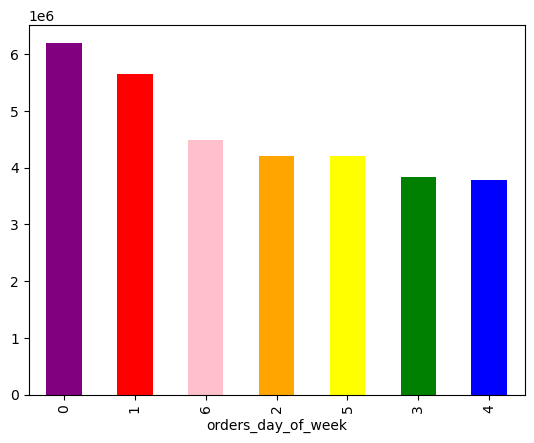

In [16]:
#adding colors and saving the charts in Jupyters memory.
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [17]:
#Exporting outside of Jupyter in the form of an image file.
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [20]:
#Conducting a data integrity check.
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [21]:
#Conducting data integrity check per each specific statictcs
ords_prods_merge['prices'].mean()

11.980225638383454

In [22]:
ords_prods_merge['prices'].median()

7.4

In [23]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

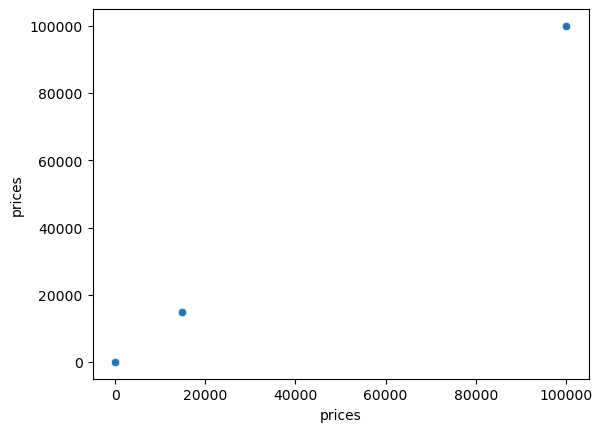

In [24]:
#Creating a scatterplot visualization
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [25]:
#Running exploratory checks on the data to determine values.
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,order_frequency_days,product_id,add_to_cart_order,reordered,...,prices,merge_flag,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_frequency_flag
10030345,171,912404,17,12,2,14,5.0,21553,5,0,...,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,High spender,Frequent customer
10030346,181,603376,17,22,6,16,4.0,21553,3,1,...,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,High spender,Frequent customer
10030347,1944,3264360,135,2,2,21,13.0,21553,6,0,...,14900.0,both,High-range product,Regularly busy,Regularly busy,Fewest orders,4,New customer,High spender,Regular customer
10030348,1945,892534,135,3,0,8,12.0,21553,3,1,...,14900.0,both,High-range product,Busiest day,Busiest days,Average orders,4,New customer,High spender,Regular customer
10030349,5708,229704,342,8,1,19,30.0,21553,9,0,...,14900.0,both,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,High spender,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,3386542,2249946,204099,29,0,8,4.0,33664,1,0,...,99999.0,both,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,High spender,Frequent customer
29166210,3386544,2363282,204099,31,0,9,2.0,33664,1,1,...,99999.0,both,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,High spender,Frequent customer
29166211,3391313,3181945,204395,13,3,15,8.0,33664,25,0,...,99999.0,both,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,High spender,Frequent customer
29166212,3405096,2486215,205227,7,3,20,4.0,33664,8,0,...,99999.0,both,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,High spender,Regular customer


In [26]:
#marking balues as missing since they doint make sens in terms of the other values in the column
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [27]:
#Checking if the replacement was succesfull
ords_prods_merge['prices'].max()

25.0

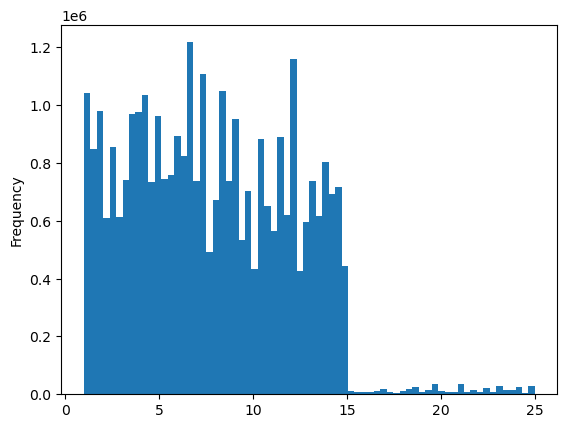

In [29]:
#Creating the histogram for prices column after data cleaning. 
hist = ords_prods_merge ['prices'].plot.hist(bins=70)

In [30]:
#Exporting outside of Jupyter in the form of an image file.
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

In [31]:
#Subsetting method to avoid crashing the machine
df = ords_prods_merge[:2000000]

In [32]:
#creating subset sampling.'seed' set of random numbers in this case seed 4
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [33]:
#creating new list called dev.
dev

array([False,  True, False, ...,  True,  True,  True])

In [36]:
#1.setting a random number generator
np.random.seed(4)

In [37]:
#2.creating 32,404,859 random numbers ranging between 0 a 1
random_numbers = np.random.rand(32404859)

In [39]:
#Checking the length of the generated 
print("Length of the random array:", len(random_numbers))

Length of the random array: 32404859


In [40]:
# Display the first few elements to double check the ranges
print("First few elements of the random array:", random_numbers[:5])

First few elements of the random array: [0.96702984 0.54723225 0.97268436 0.71481599 0.69772882]


In [41]:
#3.Performing a logical test for each number
logical_test = random_numbers > 0.7

In [42]:
#printing the result of the logical test for the first few elements
print("Logical test result for the first few elements:", logical_test[:5])

Logical test result for the first few elements: [ True False  True  True False]


In [43]:
#4.Storing the results in a new list named dev
dev = list(logical_test)

In [45]:
#Displaying the result of the logical test for the first few elements in dev
print("Result stored in dev for the first few elements:", dev[:5])

Result stored in dev for the first few elements: [True, False, True, True, False]


In [47]:
# Split the dataframe into two samples
big = ords_prods_merge[dev]
small = ords_prods_merge[~np.array(dev)]

In [48]:
#creating a list holding true/false values to the test np.random.rant() <= 0.7
dev = np.random.rand (len (ords_prods_merge)) <= 0.7

In [49]:
# Storing 70% of the sample in the dataframe big
big = ords_prods_merge [dev]

In [50]:
#storing 30% of the sample in the dataframe small
small = ords_prods_merge [~dev]

In [51]:
#Checking the expected results
len(ords_prods_merge)

32404859

In [52]:
len(big)+ len(small)

32404859

In [53]:
len(big)

22687325

In [54]:
len(small)

9717534

In [55]:
#reducing the samples to speed up the processing time
df_2 = small[['orders_day_of_week','prices']]

C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


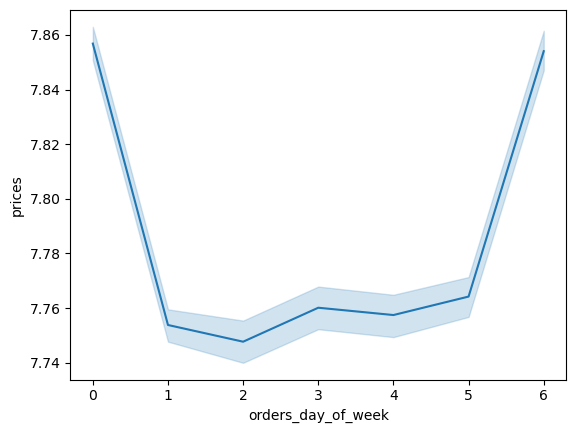

In [56]:
#creating my line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

Days of the week on the bottom and a range of product prices on the left. The blue line represents how prices differ depending on the day of the week. The peaks on days zero and six mean that most money is spent on Friday and Saturday. This might be due to people stocking up on things before the weekend. The translucent blue bands on the line are called error bands that represent the charts confidence intervals.In other words, if this line were a prediction, there would be a 95 percent probability that the predicted value would fall within the area of the error bands.

In [59]:
#Exporting outside of Jupyter in the form of an image file.
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow.png'))

In [ ]:
4.9 Exercise -------------------------------------------------------------------------